Import the distributions and check that they are normalised

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from numba import njit, float64

#Import the distributions
from distributions_nbs import g_s_nb, h_s_nb, g_b_nb, h_b_nb, g_s_nb_, h_s_nb_, g_b_nb_, h_b_nb_
from distributions import *

Plot the distributions to visualise what they look like

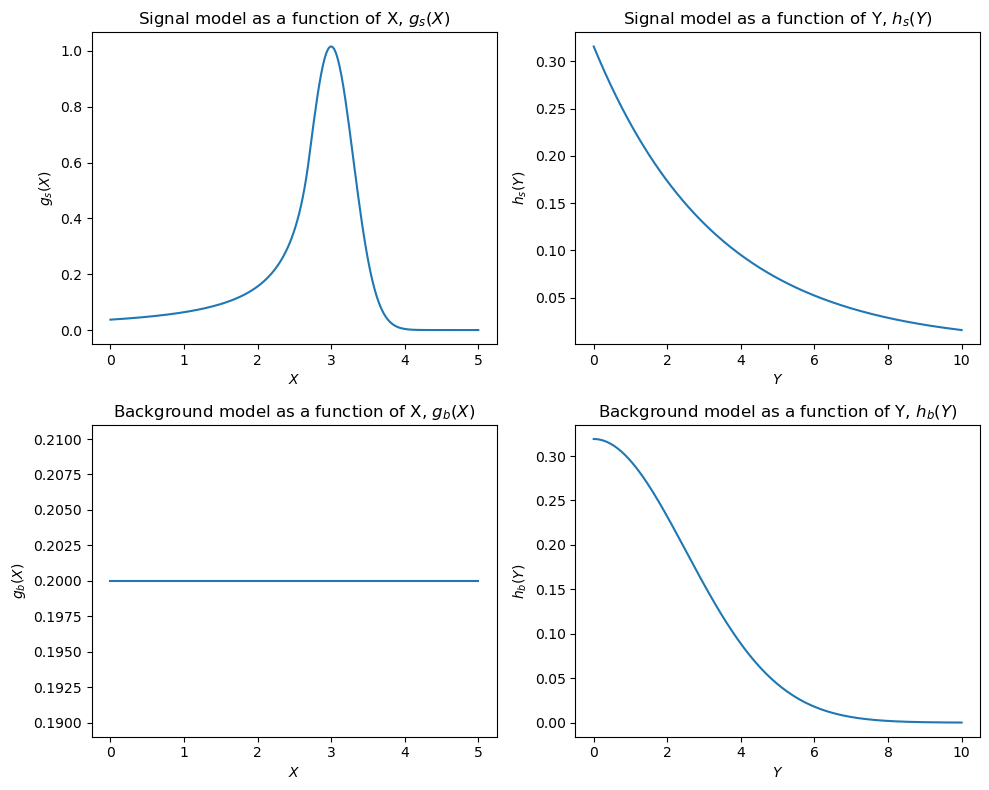

In [30]:
#Define the parameters and upper limits
mu = 3.0
sigma = 0.3
beta = 1.0
m = 1.4
f = 0.6
lmbda = 0.3
mu_b = 0.0
sigma_b = 2.5

#define upper and lower limits
X_ulim = 5.0
X_llim = 0.0
Y_ulim = 10.0
Y_llim = 0.0

# Create a 2x2 grid of plots
fig, ax = plt.subplots(2, 2, figsize=(10, 8)) 

x = np.linspace(0, 5, 200)
y = np.linspace(0, 10, 200)

#plot the signal for X
ax[0,0].plot(x, g_s_nb_(x, beta, m, mu, sigma, X_llim, X_ulim))
ax[0,0].set_title(r'Signal model as a function of X, $g_s(X)$')
ax[0,0].set_ylabel(r'$g_s(X)$')
ax[0,0].set_xlabel(r'$X$')

#plot the signal for Y
ax[0,1].plot(y, h_s_nb_(y, lmbda, Y_llim, Y_ulim))
ax[0,1].set_title(r'Signal model as a function of Y, $h_s(Y)$')
ax[0,1].set_ylabel(r'$h_s(Y)$')
ax[0,1].set_xlabel(r'$Y$')

#plot the background for X
ax[1,0].plot(x, g_b_nb_(x, X_llim, X_ulim))
ax[1,0].set_title(r'Background model as a function of X, $g_b(X)$')
ax[1,0].set_ylabel(r'$g_b(X)$')
ax[1,0].set_xlabel(r'$X$')

#plot the background for Y
ax[1,1].plot(y, h_b_nb_(y, mu_b, sigma_b, Y_llim, Y_ulim))
ax[1,1].set_title(r'Background model as a function of Y, $h_b(Y)$')
ax[1,1].set_ylabel(r'$h_b(Y)$')
ax[1,1].set_xlabel(r'$Y$')

plt.tight_layout()

Check that the pdfs are all normalised.

In [31]:
mu = 4
sigma = 9
beta = 12
m = 12
f = 0.8
lmbda = 9
mu_b = 2
sigma_b = 3

X_llim = 0
X_ulim = 5
Y_llim = 0
Y_ulim = 10

integral_g_s_nb = scipy.integrate.quad(lambda x: g_s_nb(x, beta, m, mu, sigma, X_llim, X_ulim), X_llim, X_ulim)
integral_h_s_nb = scipy.integrate.quad(lambda y: h_s_nb(y, lmbda, Y_llim, Y_ulim), Y_llim, Y_ulim)
integral_g_b_nb = scipy.integrate.quad(lambda x: g_b_nb(x, X_llim, X_ulim), X_llim, X_ulim)
integral_h_b_nb = scipy.integrate.quad(lambda y: h_b_nb(y, mu_b, sigma_b, Y_llim, Y_ulim), Y_llim, Y_ulim)

print(f'Integral of g_s_nb is {integral_g_s_nb[0]: 0.1f}, with error {integral_g_s_nb[1]}.')
print(f'Integral of h_s_nb is {integral_h_s_nb[0]: 0.1f}, with error {integral_h_s_nb[1]}.')
print(f'Integral of g_b_nb is {integral_g_b_nb[0]: 0.1f}, with error {integral_g_b_nb[1]}.')
print(f'Integral of h_b_nb is {integral_h_b_nb[0]: 0.1f}, with error {integral_h_b_nb[1]}.')

Integral of g_s_nb is  1.0, with error 1.1102230246251564e-14.
Integral of h_s_nb is  1.0, with error 4.979894357057496e-13.
Integral of g_b_nb is  1.0, with error 1.1102230246251569e-14.
Integral of h_b_nb is  1.0, with error 1.5485205646976604e-14.


Plot the marginal probability distribution $X$ and $Y$ 

$P_X = g_b(X)+g_s(X)$ and $P_Y = h_b(Y)+h_s(Y)$

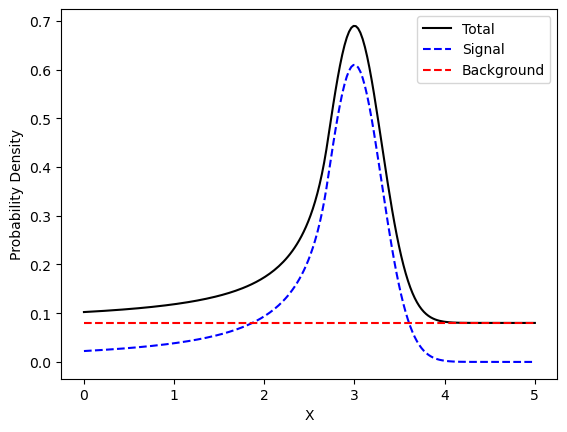

In [32]:
#Define the parameters and upper limits
mu = 3.0
sigma = 0.3
beta = 1.0
m = 1.4
f = 0.6
lmbda = 0.3
mu_b = 0.0
sigma_b = 2.5

#define upper and lower limits
X_ulim = 5.0
X_llim = 0.0
Y_ulim = 10.0
Y_llim = 0.0


@njit(float64[:](float64[:], float64, float64, float64, float64, float64, float64, float64))
def p_X_nb(X_array, f, X_llim, X_ulim, beta, m, mu, sigma):
    return (1-f) * g_b_nb_(X_array, X_llim, X_ulim) + f * g_s_nb_(X_array, beta, m, mu, sigma, X_llim, X_ulim)

@njit(float64[:](float64[:], float64, float64, float64, float64, float64, float64))
def p_Y_nb(Y_array, f, mu_b, sigma_b, Y_llim, Y_ulim, lmbda):
    return (1-f) * h_b_nb_(Y_array, mu_b, sigma_b, Y_llim, Y_ulim) + f * h_s_nb_(Y_array, lmbda, Y_llim, Y_ulim)

plt.plot(x, p_X_nb(x, f, X_llim, X_ulim, beta, m, mu, sigma), 'k-', label='Total')
plt.plot(x, f*g_s_nb_(x, beta, m, mu, sigma, X_llim, X_ulim), 'b--', label='Signal')
plt.plot(x, (1-f)*g_b_nb_(x, X_llim, X_ulim), 'r--', label='Background')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.legend()

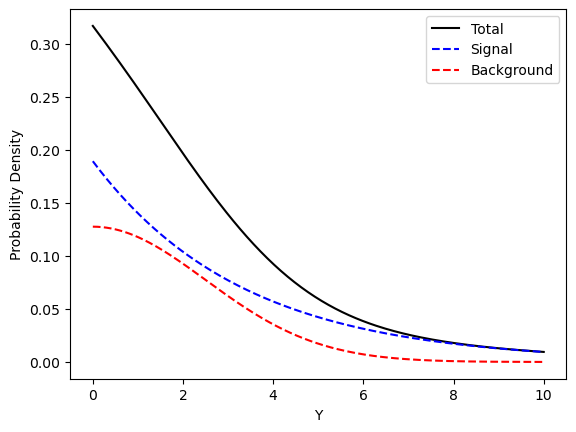

In [33]:
plt.plot(y, p_Y_nb(y, f, mu_b, sigma_b, Y_llim, Y_ulim, lmbda), 'k-', label='Total')
plt.plot(y, f*h_s_nb_(y, lmbda, Y_llim, Y_ulim), 'b--', label='Signal')
plt.plot(y, (1-f)*h_b_nb_(y, mu_b, sigma_b, Y_llim, Y_ulim), 'r--', label='Background')
plt.xlabel('Y')
plt.ylabel('Probability Density')
plt.legend()

Plot joint pdf $F(X,Y) = f g_s(X)h_s(Y) + (1-f) g_b(X)h_s(Y)$

Text(0.5, 1.0, 'Joint PDF')

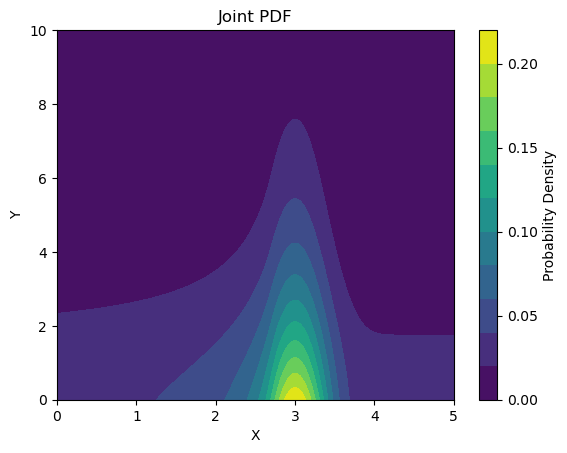

In [35]:
X, Y = np.meshgrid(x,y)

#plotted using scipy functions instead, because numba-stats functions do not take arrays of arrays
def signal_joint (X, Y):
    return f * g_s(X) * h_s (Y)

def background_joint (X, Y):
    return (1-f) * g_b (X) * h_b(Y)

def joint_pdf (X, Y):
    return signal_joint (X, Y) + background_joint(X, Y)

contour = plt.contourf(X, Y, joint_pdf(X, Y), levels = 10, cmap = 'viridis')
cbar = plt.colorbar(contour)
cbar.set_label("Probability Density")
cbar.set_ticks([0, 0.05, 0.1, 0.15, 0.2])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Joint PDF')

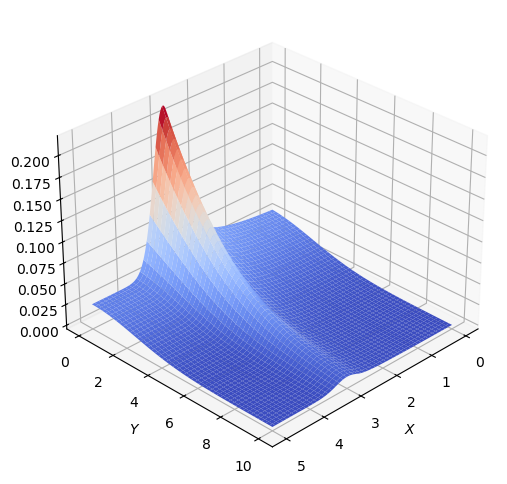

In [20]:
#Plot the 3d joint pdf
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
_ = ax.plot_surface(X, Y, joint_pdf(X, Y), cmap='coolwarm' )
ax.view_init(elev=30, azim=45)

To sample from this distribution, use the accept-reject method.

In [27]:
#use the scipy stats to find fmax scipy optimize
#feed the fmax value into accept reject sampler with njit

def find_fmax_2d(func, x_range = (X_llim, X_ulim), y_range = (Y_llim, Y_ulim)):
    f_to_min = lambda vars: -func(vars[0], vars[1])
    initial_guess = [0,1]
    result = minimize(f_to_min, x0 = initial_guess, bounds = [x_range, y_range])
    max_x, max_y = result.x
    max_f = func(max_x, max_y)
    return max_f

f_max = find_fmax_2d (joint_pdf)

f_max

0.21804724535029035

In [ ]:
#these support arrays

def signal_joint_nb_ (X, Y):
    return f * g_s_nb_(X, beta, m, mu, sigma, X_llim, X_ulim) * h_s_nb_ (Y, lmbda, Y_llim, Y_ulim)

def background_joint_nb_ (X, Y):
    return (1-f) * g_b_nb_ (X, X_llim, X_ulim) * h_b_nb_(Y, mu_b, sigma_b, Y_llim, Y_ulim)

def joint_pdf_nb_ (X, Y):
    return signal_joint_nb_ (X, Y) + background_joint_nb_(X, Y)

x=np.linspace(0,5,2)
y = np.linspace(0,10,2)
print(joint_pdf(x,y))
print(joint_pdf_nb_(x,y) )

[3.25816024e-02 8.56567916e-06]
[-1.84862442e-02 -8.56567488e-06]


In [23]:
#these support scalars

def signal_joint_nb (X, Y):
    return f * g_s_nb(X, beta, m, mu, sigma, X_llim, X_ulim) * h_s_nb (Y, lmbda, Y_llim, Y_ulim)

def background_joint_nb (X, Y):
    return (1-f) * g_b_nb (X, X_llim, X_ulim) * h_b_nb(Y, mu_b, sigma_b, Y_llim, Y_ulim)

def joint_pdf_nb (X, Y):
    return signal_joint_nb (X, Y) + background_joint_nb(X, Y)

#Check that the scipy joint pdf and the numba stats joint pdf give same answers
print(joint_pdf(1,1))
print(joint_pdf_nb(1,1))

0.032538955561082564
0.0325389555603159


In [26]:
#quick accept reject sampler
def accept_reject_2d(func, f_max, x_range = (X_llim, X_ulim), y_range = (Y_llim, Y_ulim), num_samples = 50, seed = 1):
    np.random.seed(seed)
    x_samples = np.zeros(num_samples)
    y_samples = np.zeros(num_samples)
    count = 0
    while count < num_samples:
        x_temp = np.random.uniform(x_range[0], x_range[1])
        y_temp = np.random.uniform(y_range[0], y_range[1])
        f_temp = np.random.uniform(0, f_max)
        
        if f_temp < func(x_temp, y_temp):
            x_samples[count] = x_temp
            y_samples[count] = y_temp
            count += 1
    return x_samples, y_samples

joint_pdf_sample = accept_reject_2d(joint_pdf_nb, f_max, num_samples = 100000, seed = 29)
np.savetxt('data_storage/joint_pdf_sample_s29.csv', joint_pdf_sample, delimiter=',', header = 'X,Y', comments = '')

In [39]:
#quicker accept reject sampler
def accept_reject_2d_quick(func, f_max, x_range, y_range, num_samples=50, seed=1, batch_size=1000):
    """
    Optimized 2D accept-reject sampler.
    
    Parameters:
        func (callable): The probability density function to sample from.
        f_max (float): Maximum value of func(x, y) over the specified range.
        x_range (tuple): The range (min, max) for x values.
        y_range (tuple): The range (min, max) for y values.
        num_samples (int): Number of samples to generate.
        seed (int): Random seed for reproducibility.
        batch_size (int): Number of points to generate in each batch.
    
    Returns:
        x_samples (np.ndarray): Array of x coordinates of accepted samples.
        y_samples (np.ndarray): Array of y coordinates of accepted samples.
    """
    np.random.seed(seed)
    
    x_samples = []
    y_samples = []
    
    while len(x_samples) < num_samples:
        # Generate a batch of random samples
        x_temp = np.random.uniform(x_range[0], x_range[1], batch_size)
        y_temp = np.random.uniform(y_range[0], y_range[1], batch_size)
        f_temp = np.random.uniform(0, f_max, batch_size)
        
        # Evaluate the function for the batch
        f_values = func(x_temp, y_temp)
        
        # Apply the acceptance criterion
        accepted = f_temp < f_values
        
        # Append accepted samples
        x_samples.extend(x_temp[accepted])
        y_samples.extend(y_temp[accepted])
    
    # Convert lists to arrays and trim to the desired number of samples
    x_samples = np.array(x_samples[:num_samples])
    y_samples = np.array(y_samples[:num_samples])
    
    return x_samples, y_samples

joint_pdf_sample = accept_reject_2d_quick(joint_pdf, f_max, x_range = [0,5], y_range=[0,10],num_samples = 100000, seed = 29)
np.savetxt('data_storage/joint_pdf_sample_s29.csv', joint_pdf_sample, delimiter=',', header = 'X,Y', comments = '')